<a href="https://colab.research.google.com/github/kundana12345/PainAI/blob/main/Pain_Recognition_with_Experimental_Dataset_Explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References used:


*   https://www.nature.com/articles/s41597-024-03878-w
*   https://github.com/gouverneurp/PMD
*   https://github.com/gouverneurp/XAIinPainResearch


*   https://arxiv.org/abs/2303.10607






#Data

Data Source: https://figshare.com/articles/dataset/The_PainMonit_Database_An_Experimental_and_Clinical_Physiological_Signal_Dataset_for_Automated_Pain_Recognition/26965159

I am using the Experimental Dataset (PMED), not the Clinical Dataset.

Physiological signals

* BVP (blood volume pulse) from Empatica E4

* EDA (electrodermal activity) from E4

* EDA from the research-grade biosignal device (RB)

* ECG

* EMG

* Respiration

* IBI (inter-beat interval)

* HR (heart rate)

* Skin temperature

Pain-related signals

* Thermode (heater) temperature

* CoVAS (continuous subjective pain rating)

Ground truth labels (based on temperature)

*   Baseline (no stimulus) = 0
*   Non painful stimulus = 1
*   Pain levels (P1-P4) = 2, 3, 4, 5




CoVAS:
This dataset also includes subjective pain ratings for each subject from C0 (no pain)-C4. They are subject specific and then normalized based on a subject's maximum CoVAS value.

#Pre-processing

Converting files to numpy using existing script.

In [ ]:
!git clone https://github.com/gouverneurp/PMD
%cd PMD


Cloning into 'PMD'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 37 (delta 12), reused 22 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 20.12 KiB | 2.51 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/PMD


In [ ]:
# Install typical dependencies for this type of project
!pip install numpy>=1.21.0 pandas>=1.3.0 scipy>=1.7.0 scikit-learn>=0.24.0 matplotlib>=3.4.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p /content/PMD/PMED/dataset

In [ ]:
!ls /content/PMD/PMED

config.py  create_np_files.py  dataset	heater.py  read_data.py


In [ ]:
!cp -r /content/drive/MyDrive/2025-2026/Pain_AI/PMED/dataset/raw-data/* /content/PMD/PMED/dataset/

In [ ]:
!ls dataset


ls: cannot access 'dataset': No such file or directory


In [ ]:
import glob

files = glob.glob("dataset/*.csv")
print("Found files:", len(files))
print(files[:5])


Found files: 0
[]


In [ ]:
%cd /content/PMD/PMED
!ls


/content/PMD/PMED
config.py  create_np_files.py  dataset	heater.py  read_data.py


In [ ]:
!python create_np_files.py


Create PMED np files...
0it [00:00, ?it/s]
Traceback (most recent call last):
  File "/content/PMD/PMED/create_np_files.py", line 222, in <module>
    create_np_pmhdb(overwrite= args.overwrite)
  File "/content/PMD/PMED/create_np_files.py", line 174, in create_np_pmhdb
    data = np.concatenate(data_list, axis=0)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: need at least one array to concatenate


In [ ]:
!mv dataset/*.csv dataset/raw-data/

In [ ]:
!python create_np_files.py

Create PMED np files...
100% 52/52 [00:54<00:00,  1.06s/it]

Data shape:  (2495, 2500, 6, 1)
heater shape:  (2495, 6)
covas shape:  (2495, 5)
Subjects shape:  (2495,)
Np dataset created and saved under '/content/PMD/PMED/dataset/np-dataset'.


In [ ]:
# Navigate to the numpy dataset directory
%cd /content/PMD/PMED/dataset/np-dataset/

# List the files
!ls -lh

/content/PMD/PMED/dataset/np-dataset
total 286M
-rw-r--r-- 1 root root  20K Jan 18 19:43 subjects.npy
-rw-r--r-- 1 root root 286M Jan 18 19:43 X.npy
-rw-r--r-- 1 root root  49K Jan 18 19:43 y_covas.npy
-rw-r--r-- 1 root root  59K Jan 18 19:43 y_heater.npy


In [ ]:
import numpy as np

# Load the numpy files with correct names
X = np.load('X.npy')
subjects = np.load('subjects.npy')
y_covas = np.load('y_covas.npy')  # COVAS pain ratings
y_heater = np.load('y_heater.npy')  # Heater temperature levels

# Display the shapes and basic info
print("="*50)
print("DATASET INFORMATION")
print("="*50)
print(f"X (features) shape: {X.shape}")
print(f"  - Samples: {X.shape[0]}")
print(f"  - Time steps: {X.shape[1]}")
print(f"  - Features/Channels: {X.shape[2]}")

print(f"\ny_covas (COVAS pain labels) shape: {y_covas.shape}")
print(f"  - Unique COVAS values: {np.unique(y_covas)}")
print(f"  - COVAS min: {y_covas.min()}, max: {y_covas.max()}")

print(f"\ny_heater (heater temperature) shape: {y_heater.shape}")
print(f"  - Unique heater levels: {np.unique(y_heater)}")
print(f"  - Heater min: {y_heater.min()}, max: {y_heater.max()}")

print(f"\nsubjects shape: {subjects.shape}")
print(f"  - Number of unique subjects: {len(np.unique(subjects))}")
print(f"  - Subject IDs: {sorted(np.unique(subjects))}")

DATASET INFORMATION
X (features) shape: (2495, 2500, 6, 1)
  - Samples: 2495
  - Time steps: 2500
  - Features/Channels: 6

y_covas (COVAS pain labels) shape: (2495, 5)
  - Unique COVAS values: [0. 1.]
  - COVAS min: 0.0, max: 1.0

y_heater (heater temperature) shape: (2495, 6)
  - Unique heater levels: [0. 1.]
  - Heater min: 0.0, max: 1.0

subjects shape: (2495,)
  - Number of unique subjects: 52
  - Subject IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np

In [ ]:
import numpy as np

# Convert one-hot encoded y_heater to single integer labels (0-5)
# Each row represents a sample, and the column index of '1' indicates the level.
heater_levels_flat = np.argmax(y_heater, axis=1)

unique_levels, counts = np.unique(heater_levels_flat, return_counts=True)
heater_distribution = dict(zip(unique_levels, counts))

print("Number of data points in each heater level:")
for level, count in sorted(heater_distribution.items()):
    print(f"Level {level}: {count} samples")

Number of data points in each heater level:
Level 0: 416 samples
Level 1: 416 samples
Level 2: 416 samples
Level 3: 415 samples
Level 4: 416 samples
Level 5: 416 samples


# Feature Extraction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

import shap


In [ ]:
y = y_heater_levels # use all 0–5
X_used = X
print(np.unique(y))


[0 1 2 3 4 5]


In [ ]:
from scipy.signal import find_peaks

BVP_CH = 0
EDA_CH = 1
FS_BVP = 64
FS_EDA = 4


In [ ]:
def extract_bvp_features(bvp_window, fs=FS_BVP):
    x = bvp_window.astype(float)

    # Basic stats
    mean = x.mean()
    std = x.std()
    amp = x.max() - x.min()

    # Systolic peaks
    peaks, _ = find_peaks(x, distance=int(fs * 0.5))  # >=0.5 s apart

    hr_mean = np.nan
    rmssd = np.nan
    width_mean = np.nan

    if len(peaks) > 2:
        ibis = np.diff(peaks) / fs
        ibis = ibis[(ibis > 0.4) & (ibis < 2.0)]  # 30–150 bpm
        if len(ibis) > 1:
            hr_mean = 60.0 / np.mean(ibis)
            rmssd = np.sqrt(np.mean(np.diff(ibis)**2))
        if len(peaks) > 1:
            widths = np.diff(peaks)
            width_mean = widths.mean()

    return {
        "bvp_mean": mean,
        "bvp_std": std,
        "bvp_amp": amp,
        "bvp_hr_mean": hr_mean,
        "bvp_rmssd": rmssd,
        "bvp_num_peaks": len(peaks),
        "bvp_width_mean": width_mean,
    }


In [ ]:
def extract_eda_features(eda_window):
    x = eda_window.astype(float)

    mean = x.mean()
    std = x.std()
    amp = x.max() - x.min()


    peaks, props = find_peaks(x, prominence=0.01) #may change
    num_scr = len(peaks)
    scr_amp_mean = props["prominences"].mean() if num_scr > 0 else 0.0

    return {
        "eda_mean": mean,
        "eda_std": std,
        "eda_amp": amp,
        "eda_num_scr": num_scr,
        "eda_scr_amp_mean": scr_amp_mean,
    }


In [ ]:
#put all features into X_feat
N = X.shape[0]
feature_rows = []

for i in range(N):
    bvp = X[i, :, BVP_CH, 0]
    eda = X[i, :, EDA_CH, 0]

    feats = {}
    feats.update(extract_bvp_features(bvp))
    feats.update(extract_eda_features(eda))

    feature_rows.append(feats)

X_feat = pd.DataFrame(feature_rows)
print("X_feat shape:", X_feat.shape)
print(X_feat.head())


X_feat shape: (2495, 12)
   bvp_mean    bvp_std    bvp_amp  bvp_hr_mean  bvp_rmssd  bvp_num_peaks  \
0  0.293290  24.286560  88.843660          NaN        NaN             15   
1  0.566212  23.707569  87.797120          NaN        NaN             16   
2  0.102753  23.839067  86.104535          NaN        NaN             15   
3  0.172422  22.339154  90.808795          NaN        NaN             15   
4  0.107228  24.360230  88.805770    45.988024   0.998971             19   

   bvp_width_mean  eda_mean   eda_std   eda_amp  eda_num_scr  eda_scr_amp_mean  
0      176.857143  5.450112  0.054454  0.216362            2          0.099380  
1      163.266667  5.368029  0.020497  0.079375           12          0.015363  
2      172.142857  5.351177  0.070009  0.256552            2          0.035102  
3      163.857143  5.325892  0.110672  0.368712            1          0.337815  
4      131.944444  5.193967  0.057570  0.233203            1          0.017924  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y, test_size=0.2, stratify=y, random_state=42
)

print("Labels in train:", np.unique(y_train))
print("Labels in test:", np.unique(y_test))


Labels in train: [0 1 2 3 4 5]
Labels in test: [0 1 2 3 4 5]


In [ ]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Full label distribution:", dict(zip(unique, counts)))

Full label distribution: {np.int64(0): np.int64(416), np.int64(1): np.int64(416), np.int64(2): np.int64(416), np.int64(3): np.int64(415), np.int64(4): np.int64(416), np.int64(5): np.int64(416)}


# No pain vs. Pain

In [ ]:
import numpy as np


y_levels = y

#binary now: 0 = heater 0, 1 = heater 1–5
y_bin = (y_levels > 0).astype(int)

unique, counts = np.unique(y_bin, return_counts=True)
print("Binary label distribution {no-pain(0), pain(1)}:", dict(zip(unique, counts)))


Binary label distribution {no-pain(0), pain(1)}: {np.int64(0): np.int64(416), np.int64(1): np.int64(2079)}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y_bin,
    test_size=0.2,
    stratify=y_bin,
    random_state=42
)

print("Train classes:", np.unique(y_train, return_counts=True))
print("Test classes:", np.unique(y_test, return_counts=True))


Train classes: (array([0, 1]), array([ 333, 1663]))
Test classes: (array([0, 1]), array([ 83, 416]))


RF classes: [0 1]
Classification report (no pain=0, pain=1):
              precision    recall  f1-score   support

           0       0.33      0.01      0.02        83
           1       0.83      1.00      0.91       416

    accuracy                           0.83       499
   macro avg       0.58      0.50      0.47       499
weighted avg       0.75      0.83      0.76       499

Confusion matrix (rows=true, cols=pred):
[[  1  82]
 [  2 414]]


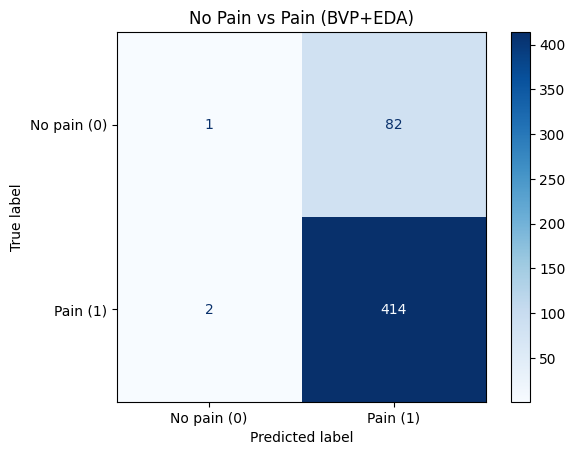

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

#RF
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    n_jobs=-1,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train_imp, y_train)

y_pred = rf.predict(X_test_imp)

print("RF classes:", rf.classes_)  # should be [0 1]
print("Classification report (no pain=0, pain=1):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print("Confusion matrix (rows=true, cols=pred):")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No pain (0)", "Pain (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("No Pain vs Pain (BVP+EDA)")
plt.show()


In [ ]:
import shap


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_imp)

print("Classes for SHAP:", rf.classes_)


Classes for SHAP: [0 1]


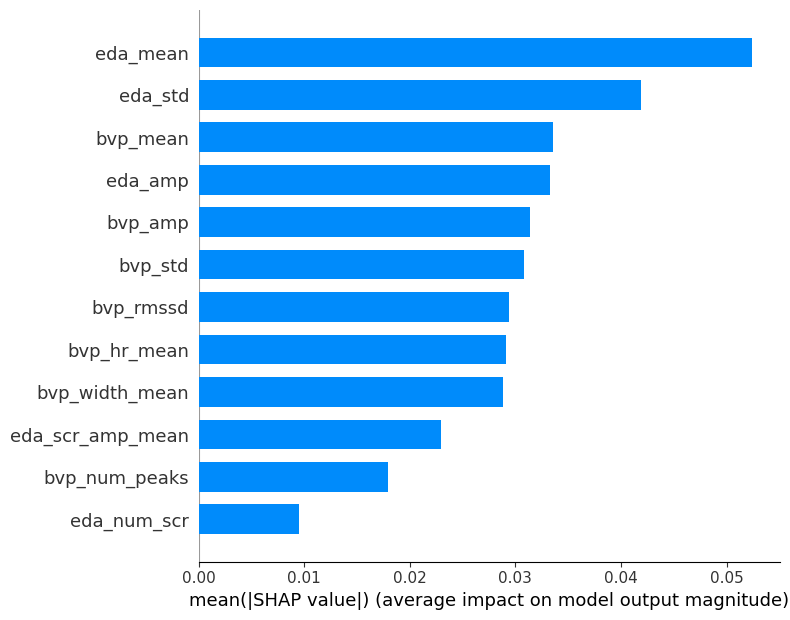

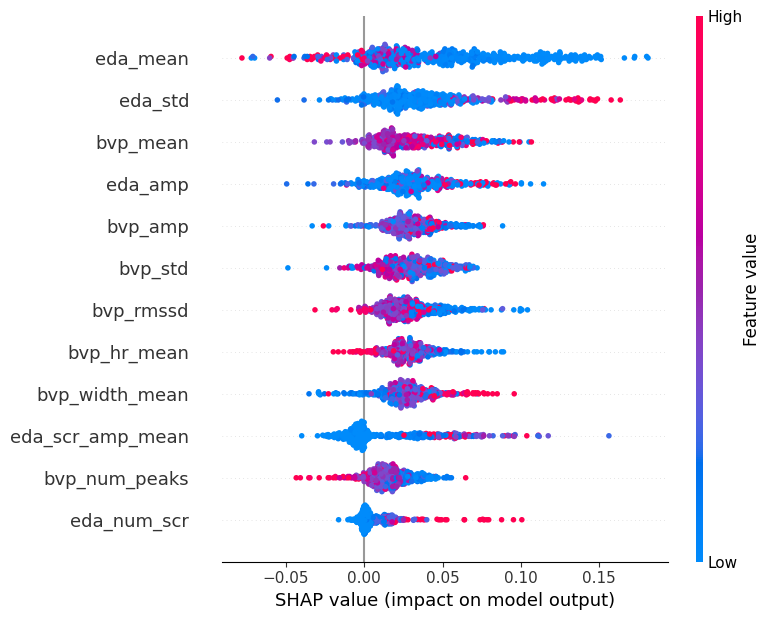

In [ ]:
idx_pain = list(rf.classes_).index(1)

shap_values_for_pain_class = shap_values[:, :, idx_pain]

shap.summary_plot(
    shap_values_for_pain_class,
    X_test_imp,
    feature_names=X_feat.columns,
    plot_type="bar"
)

shap.summary_plot(
    shap_values_for_pain_class,
    X_test_imp,
    feature_names=X_feat.columns
)


# XAI Features

In [ ]:
!git clone https://github.com/gouverneurp/XAIinPainResearch.git

Cloning into 'XAIinPainResearch'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 31 (delta 4), reused 3 (delta 3), pack-reused 21 (from 1)
Receiving objects: 100% (31/31), 51.15 KiB | 1.89 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
%cd XAIinPainResearch

/content/PMD/PMED/dataset/np-dataset/XAIinPainResearch


In [ ]:
!ls


config.py	    datasets  main.py	 requirements.txt
create_np_files.py  hcf.py    README.md  scripts


# All signals

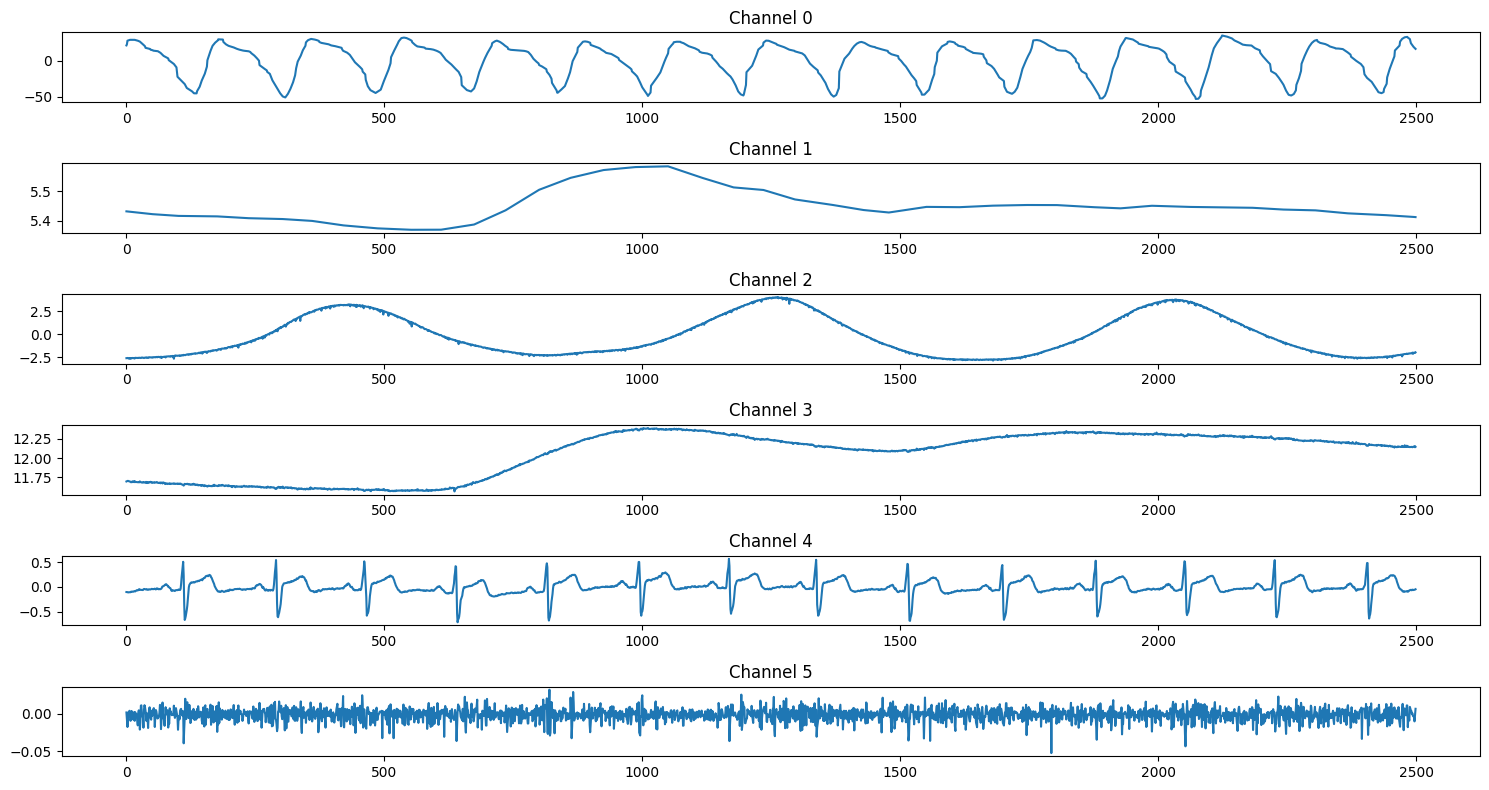

In [ ]:
import matplotlib.pyplot as plt

sample_id = 0

plt.figure(figsize=(15, 8))

for ch in range(X.shape[2]):
    plt.subplot(X.shape[2], 1, ch+1)
    plt.plot(X[sample_id, :, ch, 0])
    plt.title(f"Channel {ch}")
    plt.tight_layout()

plt.show()


In [ ]:
CHANNEL_MAP = {
    0: "Resp",
    1: "EDA",
    2: "SkinTemp",
    3: "BVP",
    4: "ECG",
    5: "EMG"
}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, welch
from scipy.stats import skew, kurtosis

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import shap


In [ ]:
FS = 100


In [ ]:
def basic_features(x):
    return {
        "mean": np.mean(x),
        "std": np.std(x),
        "min": np.min(x),
        "max": np.max(x),
        "range": np.ptp(x),
        "rms": np.sqrt(np.mean(x**2)),
        "iqr": np.percentile(x, 75) - np.percentile(x, 25),
        "skew": skew(x),
        "kurtosis": kurtosis(x),
        "energy": np.sum(x**2),
        "diff1": np.mean(np.abs(np.diff(x))),
        "diff2": np.mean(np.abs(np.diff(x, 2)))
    }


In [ ]:
def eda_features(x):
    peaks, props = find_peaks(x, height=np.std(x))
    return {
        "scr_count": len(peaks),
        "scr_mean_amp": np.mean(props["peak_heights"]) if len(peaks) > 0 else 0,
        "scr_max_amp": np.max(props["peak_heights"]) if len(peaks) > 0 else 0,
        "tonic_mean": np.mean(x),
        "phasic_std": np.std(x - np.mean(x))
    }


In [ ]:
def hr_features(x):
    peaks, _ = find_peaks(x, distance=int(0.4 * FS))

    if len(peaks) < 2:
        return {
            "hr_mean": 0,
            "hr_std": 0,
            "rr_mean": 0,
            "rr_std": 0,
            "rmssd": 0,
            "peak_count": len(peaks)
        }

    rr = np.diff(peaks) / FS
    hr = 60 / rr

    return {
        "hr_mean": np.mean(hr),
        "hr_std": np.std(hr),
        "rr_mean": np.mean(rr),
        "rr_std": np.std(rr),
        "rmssd": np.sqrt(np.mean(np.diff(rr)**2)),
        "peak_count": len(peaks)
    }


In [ ]:
def emg_features(x):
    freqs, psd = welch(x, FS)
    mnf = np.sum(freqs * psd) / np.sum(psd)
    mdf = freqs[np.where(np.cumsum(psd) >= np.sum(psd)/2)[0][0]]
    zc = np.sum(np.diff(np.sign(x)) != 0)

    return {
        "mav": np.mean(np.abs(x)),
        "rms": np.sqrt(np.mean(x**2)),
        "zero_crossings": zc,
        "mnf": mnf,
        "mdf": mdf
    }


In [ ]:
def resp_features(x):
    peaks, _ = find_peaks(x, distance=FS)
    duration = len(x) / FS
    breathing_rate = len(peaks) * (60 / duration)

    return {
        "breathing_rate": breathing_rate,
        "resp_std": np.std(x)
    }


In [ ]:
def extract_features(X):
    rows = []

    for i in range(X.shape[0]):
        sample_feats = {}

        for ch in range(X.shape[2]):
            sig = X[i, :, ch, 0]
            name = CHANNEL_MAP[ch]

            # basic
            for k, v in basic_features(sig).items():
                sample_feats[f"{name}_{k}"] = v

            # signal-specific
            if name == "EDA":
                for k, v in eda_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name in ["ECG", "BVP"]:
                for k, v in hr_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "EMG":
                for k, v in emg_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "Resp":
                for k, v in resp_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

        rows.append(sample_feats)

    return pd.DataFrame(rows)


In [ ]:
X_feat = extract_features(X)
print("Feature matrix:", X_feat.shape)


Feature matrix: (2495, 95)


In [ ]:
#y_heater is one-hot encoded: shape (2495, 6)
y = np.argmax(y_heater, axis=1)

print("Unique heat levels:", np.unique(y))


Unique heat levels: [0 1 2 3 4 5]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_feat,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=400,
                       n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       0.41      0.57      0.47        83
           1       0.25      0.28      0.26        83
           2       0.12      0.08      0.10        83
           3       0.13      0.11      0.12        83
           4       0.20      0.14      0.17        84
           5       0.50      0.63      0.56        83

    accuracy                           0.30       499
   macro avg       0.27      0.30      0.28       499
weighted avg       0.27      0.30      0.28       499



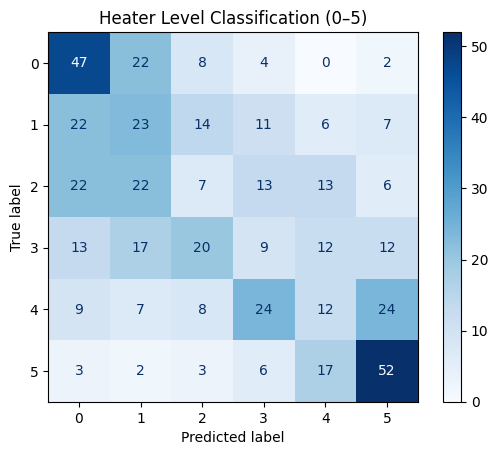

In [ ]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0,1,2,3,4,5]
)
disp.plot(cmap="Blues")
plt.title("Heater Level Classification (0–5)")
plt.show()


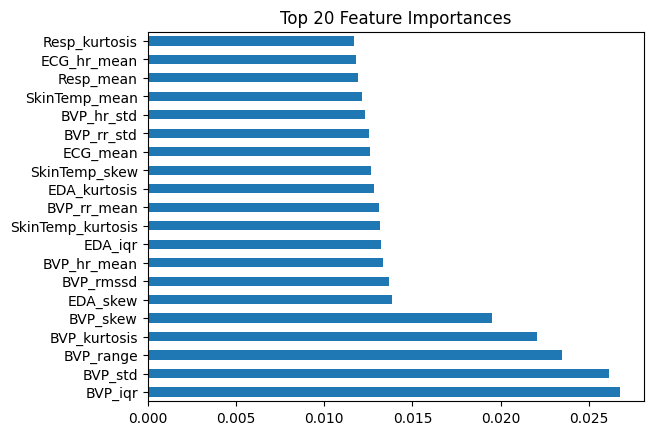

In [ ]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_feat.columns
).sort_values(ascending=False)

importances.head(20).plot(kind="barh")
plt.title("Top 20 Feature Importances")
plt.show()


# UPDATED JAN 17


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Imports for feature extraction
from scipy.signal import find_peaks, welch
from scipy.stats import skew, kurtosis

# Define CHANNEL_MAP and FS
CHANNEL_MAP = {
    0: "Resp",
    1: "EDA",
    2: "SkinTemp",
    3: "BVP",
    4: "ECG",
    5: "EMG"
}
FS = 100

In [ ]:
# Helper functions for feature extraction
def basic_features(x):
    return {
        "mean": np.mean(x),
        "std": np.std(x),
        "min": np.min(x),
        "max": np.max(x),
        "range": np.ptp(x),
        "rms": np.sqrt(np.mean(x**2)),
        "iqr": np.percentile(x, 75) - np.percentile(x, 25),
        "skew": skew(x),
        "kurtosis": kurtosis(x),
        "energy": np.sum(x**2),
        "diff1": np.mean(np.abs(np.diff(x))),
        "diff2": np.mean(np.abs(np.diff(x, 2)))
    }

def eda_features(x):
    # Ensure x is float to avoid precision issues in find_peaks height calculation
    x = x.astype(float)
    peaks, props = find_peaks(x, height=np.std(x)) # Use height for basic filtering
    return {
        "scr_count": len(peaks),
        "scr_mean_amp": np.mean(props["peak_heights"]) if len(peaks) > 0 else 0,
        "scr_max_amp": np.max(props["peak_heights"]) if len(peaks) > 0 else 0,
        "tonic_mean": np.mean(x),
        "phasic_std": np.std(x - np.mean(x))
    }

def hr_features(x):
    peaks, _ = find_peaks(x, distance=int(0.4 * FS))

    if len(peaks) < 2:
        return {
            "hr_mean": 0,
            "hr_std": 0,
            "rr_mean": 0,
            "rr_std": 0,
            "rmssd": 0,
            "peak_count": len(peaks)
        }

    rr = np.diff(peaks) / FS
    hr = 60 / rr

    return {
        "hr_mean": np.mean(hr),
        "hr_std": np.std(hr),
        "rr_mean": np.mean(rr),
        "rr_std": np.std(rr),
        "rmssd": np.sqrt(np.mean(np.diff(rr)**2)),
        "peak_count": len(peaks)
    }

def emg_features(x):
    freqs, psd = welch(x, FS)
    # Handle cases where np.sum(psd) might be zero to avoid division by zero
    mnf = np.sum(freqs * psd) / np.sum(psd) if np.sum(psd) != 0 else 0
    mdf = freqs[np.where(np.cumsum(psd) >= np.sum(psd)/2)[0][0]] if np.sum(psd) != 0 else 0
    zc = np.sum(np.diff(np.sign(x)) != 0)

    return {
        "mav": np.mean(np.abs(x)),
        "rms": np.sqrt(np.mean(x**2)),
        "zero_crossings": zc,
        "mnf": mnf,
        "mdf": mdf
    }

def resp_features(x):
    peaks, _ = find_peaks(x, distance=FS)
    duration = len(x) / FS
    breathing_rate = len(peaks) * (60 / duration) if duration > 0 else 0

    return {
        "breathing_rate": breathing_rate,
        "resp_std": np.std(x)
    }

In [ ]:
# Main feature extraction function
def extract_features(X):
    rows = []

    for i in range(X.shape[0]):
        sample_feats = {}

        for ch in range(X.shape[2]):
            sig = X[i, :, ch, 0] # Assuming X has shape (samples, time_steps, channels, 1)
            name = CHANNEL_MAP[ch]

            # basic features
            for k, v in basic_features(sig).items():
                sample_feats[f"{name}_{k}"] = v

            # signal-specific features
            if name == "EDA":
                for k, v in eda_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name in ["ECG", "BVP"]:
                for k, v in hr_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "EMG":
                for k, v in emg_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

            if name == "Resp":
                for k, v in resp_features(sig).items():
                    sample_feats[f"{name}_{k}"] = v

        rows.append(sample_feats)

    return pd.DataFrame(rows)

X_feat = extract_features(X)
print("Feature matrix shape:", X_feat.shape)

/tmp/ipython-input-2300037523.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "skew": skew(x),
/tmp/ipython-input-2300037523.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "kurtosis": kurtosis(x),


Feature matrix shape: (2495, 95)


# Added Group shuffle

In [ ]:
X_feat = extract_features(X)
print("Feature matrix shape:", X_feat.shape)

/tmp/ipython-input-2300037523.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "skew": skew(x),
/tmp/ipython-input-2300037523.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "kurtosis": kurtosis(x),


Feature matrix shape: (2495, 95)


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

print("Imported GroupShuffleSplit for group-based splitting.")

Imported GroupShuffleSplit for group-based splitting.


In [ ]:
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in gss.split(X_feat, y, groups=subjects):
    X_train_grouped = X_feat.iloc[train_idx]
    X_test_grouped = X_feat.iloc[test_idx]
    y_train_grouped = y[train_idx]
    y_test_grouped = y[test_idx]
    subjects_train_grouped = subjects[train_idx]
    subjects_test_grouped = subjects[test_idx]

print("Shape of X_train_grouped:", X_train_grouped.shape)
print("Shape of X_test_grouped:", X_test_grouped.shape)
print("Shape of y_train_grouped:", y_train_grouped.shape)
print("Shape of y_test_grouped:", y_test_grouped.shape)

print("\nUnique subjects in training set:", np.unique(subjects_train_grouped))
print("Number of unique subjects in training set:", len(np.unique(subjects_train_grouped)))
print("Unique subjects in testing set:", np.unique(subjects_test_grouped))
print("Number of unique subjects in testing set:", len(np.unique(subjects_test_grouped)))

common_subjects = np.intersect1d(np.unique(subjects_train_grouped), np.unique(subjects_test_grouped))
print("\nCommon subjects between train and test sets:", common_subjects)
print("Number of common subjects:", len(common_subjects))

Shape of X_train_grouped: (1967, 95)
Shape of X_test_grouped: (528, 95)
Shape of y_train_grouped: (1967,)
Shape of y_test_grouped: (528,)

Unique subjects in training set: [ 0  1  2  4  6  7  8  9 10 11 14 15 16 18 20 21 22 23 24 25 26 27 28 29
 30 31 33 34 35 36 37 38 39 40 42 44 45 46 48 49 51]
Number of unique subjects in training set: 41
Unique subjects in testing set: [ 3  5 12 13 17 19 32 41 43 47 50]
Number of unique subjects in testing set: 11

Common subjects between train and test sets: []
Number of common subjects: 0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_grouped_imp = imputer.fit_transform(X_train_grouped)
X_test_grouped_imp = imputer.transform(X_test_grouped)

print("Shape of X_train_grouped after imputation:", X_train_grouped_imp.shape)
print("Shape of X_test_grouped after imputation:", X_test_grouped_imp.shape)
print("Missing values in X_train_grouped_imp (should be 0):", np.sum(np.isnan(X_train_grouped_imp)))
print("Missing values in X_test_grouped_imp (should be 0):", np.sum(np.isnan(X_test_grouped_imp)))

Shape of X_train_grouped after imputation: (1967, 95)
Shape of X_test_grouped after imputation: (528, 95)
Missing values in X_train_grouped_imp (should be 0): 0
Missing values in X_test_grouped_imp (should be 0): 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_grouped = RandomForestClassifier(
    n_estimators=400,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model_grouped.fit(X_train_grouped_imp, y_train_grouped)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.



Classification Report (Grouped Split):
              precision    recall  f1-score   support

           0       0.27      0.34      0.30        88
           1       0.20      0.28      0.23        88
           2       0.19      0.24      0.21        88
           3       0.20      0.10      0.14        88
           4       0.31      0.22      0.26        88
           5       0.60      0.50      0.55        88

    accuracy                           0.28       528
   macro avg       0.30      0.28      0.28       528
weighted avg       0.30      0.28      0.28       528



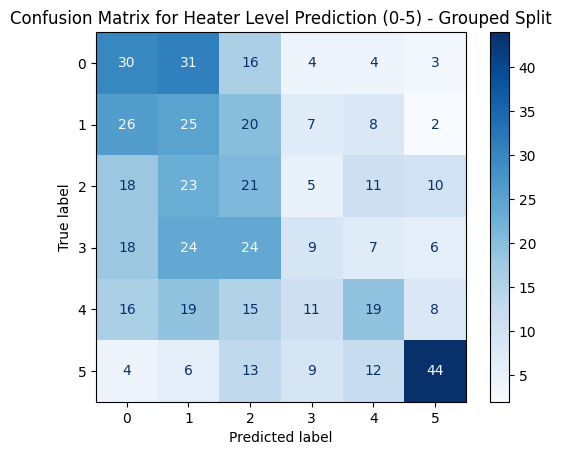

In [ ]:
y_pred_grouped = rf_model_grouped.predict(X_test_grouped_imp)

print("\nClassification Report (Grouped Split):")
print(classification_report(y_test_grouped, y_pred_grouped))

cm_grouped = confusion_matrix(y_test_grouped, y_pred_grouped, labels=np.unique(y))
disp_grouped = ConfusionMatrixDisplay(
    confusion_matrix=cm_grouped,
    display_labels=np.unique(y)
)
disp_grouped.plot(cmap="Blues")
plt.title("Confusion Matrix for Heater Level Prediction (0-5) - Grouped Split")
plt.show()


Top 20 Feature Importances (Grouped Split):
BVP_iqr              0.029211
BVP_std              0.026507
BVP_range            0.023708
BVP_kurtosis         0.023086
BVP_skew             0.017228
BVP_rr_mean          0.014315
EDA_iqr              0.014314
SkinTemp_kurtosis    0.014157
BVP_rmssd            0.013722
BVP_hr_mean          0.013621
SkinTemp_skew        0.013572
BVP_rr_std           0.013479
ECG_mean             0.013157
EDA_kurtosis         0.013123
BVP_hr_std           0.012903
EDA_skew             0.012582
Resp_mean            0.012312
SkinTemp_mean        0.012001
EDA_std              0.011886
Resp_skew            0.011851
dtype: float64


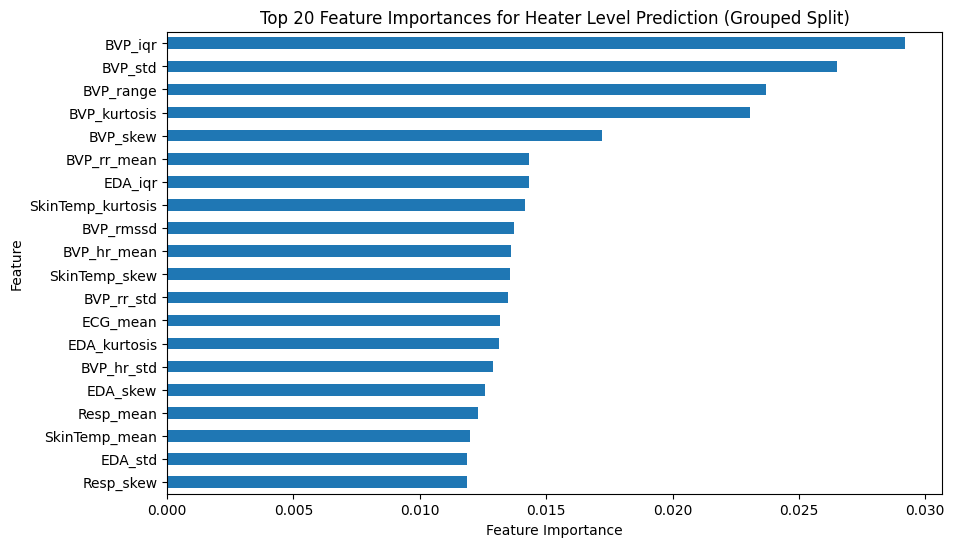

In [ ]:
importances_grouped = pd.Series(
    rf_model_grouped.feature_importances_,
    index=X_feat.columns
).sort_values(ascending=False)

print("\nTop 20 Feature Importances (Grouped Split):")
print(importances_grouped.head(20))

plt.figure(figsize=(10, 6))
importances_grouped.head(20).plot(kind="barh")
plt.title("Top 20 Feature Importances for Heater Level Prediction (Grouped Split)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()